### 6.3 graphical visualizations 
>1. import libraries and data
2. data wrangling and cleaning
3. plotting a chloropleth

### 1. import libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import json
import folium

In [2]:
%matplotlib inline

In [3]:
#import json file for us
country_geo = (r"C:\Users\andre\OneDrive\Documents\coursework 2022\CF\Immersion\Achievement 6\2 data\shapefile for 6.3\us-states.json")
country_geo

'C:\\Users\\andre\\OneDrive\\Documents\\coursework 2022\\CF\\Immersion\\Achievement 6\\2 data\\shapefile for 6.3\\us-states.json'

In [4]:
#view the file, identify the key column path

f = open(r"C:\Users\andre\OneDrive\Documents\coursework 2022\CF\Immersion\Achievement 6\2 data\shapefile for 6.3\us-states.json")

data = json.load(f) #return json as a dictionary

for i in data['features']:
    print(i)

{'type': 'Feature', 'id': 'AL', 'properties': {'name': 'Alabama'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-87.359296, 35.00118], [-85.606675, 34.984749], [-85.431413, 34.124869], [-85.184951, 32.859696], [-85.069935, 32.580372], [-84.960397, 32.421541], [-85.004212, 32.322956], [-84.889196, 32.262709], [-85.058981, 32.13674], [-85.053504, 32.01077], [-85.141136, 31.840985], [-85.042551, 31.539753], [-85.113751, 31.27686], [-85.004212, 31.003013], [-85.497137, 30.997536], [-87.600282, 30.997536], [-87.633143, 30.86609], [-87.408589, 30.674397], [-87.446927, 30.510088], [-87.37025, 30.427934], [-87.518128, 30.280057], [-87.655051, 30.247195], [-87.90699, 30.411504], [-87.934375, 30.657966], [-88.011052, 30.685351], [-88.10416, 30.499135], [-88.137022, 30.318396], [-88.394438, 30.367688], [-88.471115, 31.895754], [-88.241084, 33.796253], [-88.098683, 34.891641], [-88.202745, 34.995703], [-87.359296, 35.00118]]]}}
{'type': 'Feature', 'id': 'AK', 'properties': {'name': 'Alaska'},

In [5]:
#import dataframe saved from 6.2
df = pd.read_csv(r"C:\Users\andre\OneDrive\Documents\coursework 2022\CF\Immersion\Achievement 6\2 data\prepared data\task_6.2.csv")

### 2 cleaning and wrangling

In [6]:
#view head and tail, shape
df

,Unnamed: 0,Order Date,Row ID,Order ID,Ship Mode,Customer ID,Segment,Country,City,State,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,prof_cat
0,0,2020-01-01,849,CA-2017-107503,Standard Class,GA-14725,Consumer,United States,Lorain,Ohio,...,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",48.896,4,0.2,8.5568,low profit
1,1,2020-01-01,4010,CA-2017-144463,Standard Class,SC-20725,Consumer,United States,Los Angeles,California,...,West,FUR-FU-10001215,Furniture,Furnishings,"Howard Miller 11-1/2"" Diameter Brentwood Wall ...",474.430,11,0.0,199.2606,high profit
2,2,2020-01-01,6683,CA-2017-154466,First Class,DP-13390,Home Office,United States,Franklin,Wisconsin,...,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.600,2,0.0,1.7280,low profit
3,3,2020-01-01,8070,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,...,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,454.560,5,0.2,-107.9580,profit loss
4,4,2020-01-01,8071,CA-2017-151750,Standard Class,JM-15250,Consumer,United States,Huntsville,Texas,...,Central,FUR-FU-10002116,Furniture,Furnishings,"Tenex Carpeted, Granite-Look or Clear Contempo...",141.420,5,0.6,-187.3815,profit loss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307,3307,2020-12-30,908,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,...,East,TEC-PH-10004774,Technology,Phones,Gear Head AU3700S Headset,90.930,7,0.0,2.7279,low profit
3308,3308,2020-12-30,909,CA-2017-143259,Standard Class,PO-18865,Consumer,United States,New York City,New York,...,East,OFF-BI-10003684,Office Supplies,Binders,Wilson Jones Legal Size Ring Binders,52.776,3,0.2,19.7910,low profit
3309,3309,2020-12-30,1297,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,...,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,low profit
3310,3310,2020-12-30,1298,CA-2017-115427,Standard Class,EB-13975,Corporate,United States,Fairfield,California,...,West,OFF-BI-10004632,Office Supplies,Binders,GBC Binding covers,20.720,2,0.2,6.4750,low profit


In [16]:
#view data types
#count of null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    3312 non-null   datetime64[ns]
 1   Row ID        3312 non-null   string        
 2   Order ID      3312 non-null   object        
 3   Ship Mode     3312 non-null   object        
 4   Customer ID   3312 non-null   object        
 5   Segment       3312 non-null   object        
 6   Country       3312 non-null   object        
 7   City          3312 non-null   object        
 8   State         3312 non-null   object        
 9   Postal Code   3312 non-null   string        
 10  Region        3312 non-null   object        
 11  Product ID    3312 non-null   object        
 12  Category      3312 non-null   object        
 13  Sub-Category  3312 non-null   object        
 14  Product Name  3312 non-null   object        
 15  Sales         3312 non-null   float64 

#### drop index column and change data types

In [10]:
#drop added index column 
df = df.drop(columns = 'Unnamed: 0')

In [11]:
#change data type of order date, row id, postal code

df['Order Date'] = df['Order Date'].astype('datetime64') 
df['Row ID'] = df['Row ID'].astype('string')
df['Postal Code'] = df['Postal Code'].astype('string')

In [12]:
#check  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Order Date    3312 non-null   datetime64[ns]
 1   Row ID        3312 non-null   string        
 2   Order ID      3312 non-null   object        
 3   Ship Mode     3312 non-null   object        
 4   Customer ID   3312 non-null   object        
 5   Segment       3312 non-null   object        
 6   Country       3312 non-null   object        
 7   City          3312 non-null   object        
 8   State         3312 non-null   object        
 9   Postal Code   3312 non-null   string        
 10  Region        3312 non-null   object        
 11  Product ID    3312 non-null   object        
 12  Category      3312 non-null   object        
 13  Sub-Category  3312 non-null   object        
 14  Product Name  3312 non-null   object        
 15  Sales         3312 non-null   float64 

#### check for duplicates and missing values

In [23]:
#check for dups 
df.duplicated().value_counts()


False    3312
dtype: int64

In [21]:
#check for missing values again

df.isnull().sum() 

Order Date      0
Row ID          0
Order ID        0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
prof_cat        0
dtype: int64

#### view profit spread

<Axes: xlabel='Profit', ylabel='Count'>

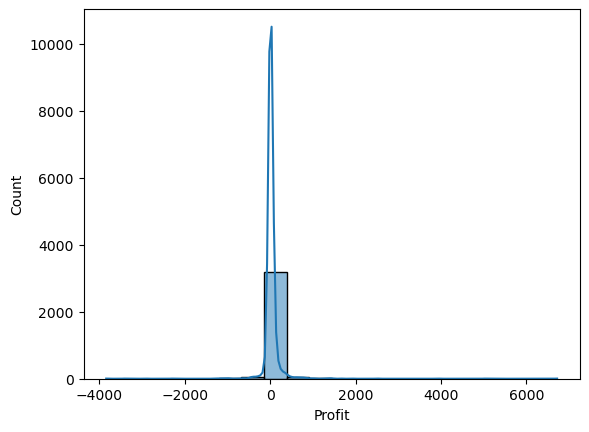

In [33]:
sns.histplot(df['Profit'],bins = 20, kde = True) #seaborn histogram

In [34]:
#subset the profit reducing outliers, viewing to create bins for flag column
sub_profit = df['Profit'][(df['Profit'] > -200) & (df['Profit'] < 200)]

<Axes: xlabel='Profit', ylabel='Count'>

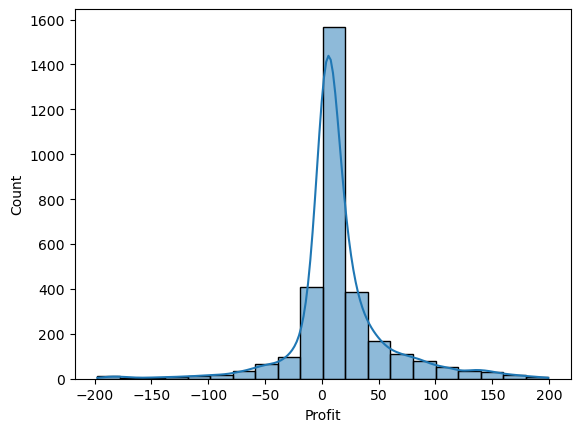

In [35]:
sns.histplot(sub_profit, bins = 20, kde = True)

insight: 
profit shows a normal distribution in the subset

In [37]:
#check number of rows in this subset
sub_profit.describe()

count    3118.000000
mean       15.390050
std        42.028588
min      -197.575200
25%         1.777325
50%         7.739650
75%        24.221675
max       199.260600
Name: Profit, dtype: float64

In [ ]:
#subset removes about 6% of data
#the extreme profit values need to be studied for anomalies to reach a final conclusion
#using the subset which smooths profit for next steps

#### add state to subset

In [42]:
#creating a subset of columnns needed for analysis: state and profit 
clean_sub_state_profit = df[['State','Profit']][(df['Profit'] > -200) & (df['Profit'] < 200)]

In [43]:
#check 
clean_sub_state_profit

,State,Profit
0,Ohio,8.5568
1,California,199.2606
2,Wisconsin,1.7280
3,Texas,-107.9580
4,Texas,-187.3815
...,...,...
3307,New York,2.7279
3308,New York,19.7910
3309,California,4.5188
3310,California,6.4750


### 3 creating the geospatial plots

#### plotting subset

In [44]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = clean_sub_state_profit,
    columns = ['State', 'Profit'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

In [45]:
map

### insight:
virginia has highest profit


### second plot with full data set

In [46]:
#create subset of state and profit
sub_full_data = df[['State', 'Profit']]

In [51]:
#check
sub_full_data.describe()

,Profit
count,3312.000000
mean,28.212340
std,241.864342
min,-3839.990400
25%,1.763200
50%,8.296800
75%,28.315125
max,6719.980800


In [52]:
#view shape
sub_full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3312 entries, 0 to 3311
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   State   3312 non-null   object 
 1   Profit  3312 non-null   float64
dtypes: float64(1), object(1)
memory usage: 51.9+ KB


In [48]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = sub_full_data,
    columns = ['State', 'Profit'],
    key_on = 'feature.properties.name', # this part is very important - check your json file to see where the KEY is located
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "rating").add_to(map)
folium.LayerControl().add_to(map)

map

### insight
using outliers has shifted Missouri into state with highest profits according to map

### summary:
* plots do not show data as expected 
    California, New York, and Washington State were top profit centers from EDA 
* further analysis required to uncover the discrepency